In [2]:
import pandas_datareader.data as reader
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns



end = dt.datetime.now()
start = dt.date(end.year - 6,end.month,end.day)

kryptolist = ['BTC-USD','ETH-USD','ADA-USD','ERG-USD','SOL-USD']

In [3]:
df = reader.DataReader(kryptolist, 'yahoo', start, end)['Adj Close']

In [4]:
df

Symbols,BTC-USD,ETH-USD,ADA-USD,ERG-USD,SOL-USD
Date,,,,,
2016-06-15,694.468994,NaN,NaN,NaN,NaN
2016-06-16,766.307983,NaN,NaN,NaN,NaN
2016-06-17,748.908997,NaN,NaN,NaN,NaN
2016-06-18,756.226990,NaN,NaN,NaN,NaN
2016-06-19,763.781006,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-06-11,28360.810547,1529.663452,0.552777,2.157764,33.821117
2022-06-12,26762.648438,1445.216553,0.496861,2.057471,30.743271
2022-06-13,22487.388672,1204.582764,0.463133,1.846349,28.192362


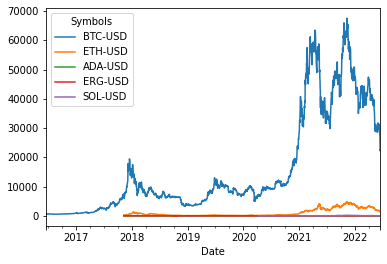

In [5]:
df.plot()
plt.show()



In [6]:
df2 = df.drop(['BTC-USD'], axis=1)

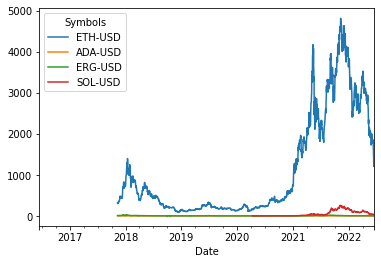

In [7]:
df2.plot()
plt.show()

Para comparar criptomonedas tenemos q trabajar con los retornos y no los precios absolutos

In [8]:
retornos_diarios = df.pct_change()

In [9]:
retornos_diarios

Symbols,BTC-USD,ETH-USD,ADA-USD,ERG-USD,SOL-USD
Date,,,,,
2016-06-15,NaN,NaN,NaN,NaN,NaN
2016-06-16,0.103444,NaN,NaN,NaN,NaN
2016-06-17,-0.022705,NaN,NaN,NaN,NaN
2016-06-18,0.009772,NaN,NaN,NaN,NaN
2016-06-19,0.009989,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-06-11,-0.024859,-0.081307,-0.037336,-0.067542,-0.088128
2022-06-12,-0.056351,-0.055206,-0.101155,-0.046480,-0.091004
2022-06-13,-0.159747,-0.166504,-0.067882,-0.102612,-0.082975



Ahora necesitamos acumular los retornos para comprar las monedas

In [11]:
retorno_diarios_acumulativos = (retornos_diarios+ 1).cumprod() -1

RA = [ (1 + RC) ^ (1/n) ] -1.

In [12]:
retorno_diarios_acumulativos

Symbols,BTC-USD,ETH-USD,ADA-USD,ERG-USD,SOL-USD
Date,,,,,
2016-06-15,NaN,NaN,NaN,NaN,NaN
2016-06-16,0.103444,NaN,NaN,NaN,NaN
2016-06-17,0.078391,NaN,NaN,NaN,NaN
2016-06-18,0.088928,NaN,NaN,NaN,NaN
2016-06-19,0.099806,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-06-11,39.838123,3.767029,16.245717,-0.766476,34.561722
2022-06-12,37.536851,3.503860,14.501232,-0.777330,31.325474
2022-06-13,31.380695,2.753951,13.448975,-0.800179,28.643283


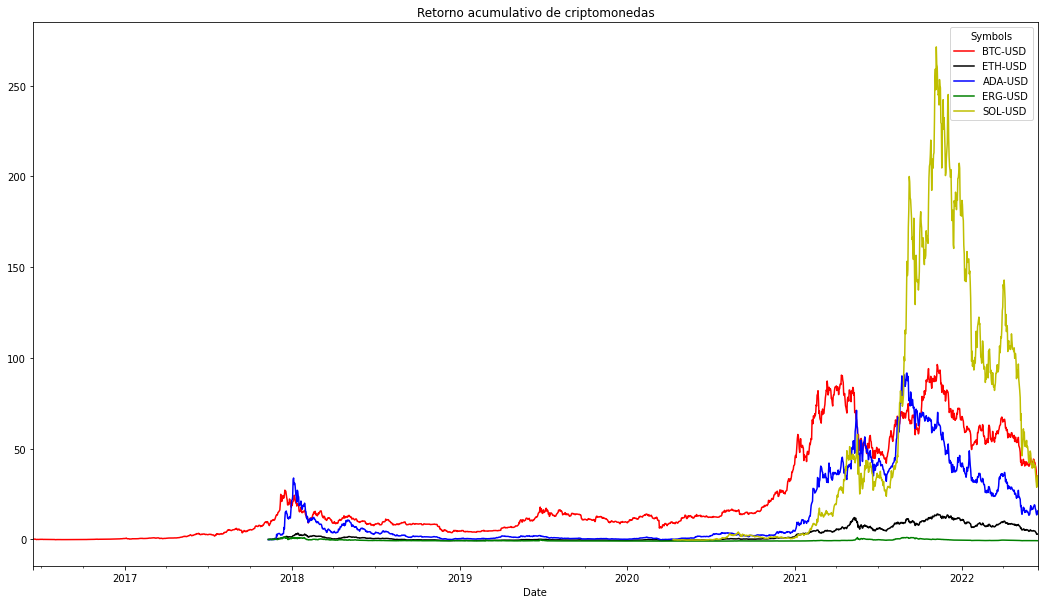

In [14]:
colores = ['r','k','b','g','y']
retorno_diarios_acumulativos.plot(color=colores, figsize=(18,10))
plt.title('Retorno acumulativo de criptomonedas')
plt.show()

Cryptocurrency price charts over last 6 years

Text(0.5, 1.0, 'SOL')

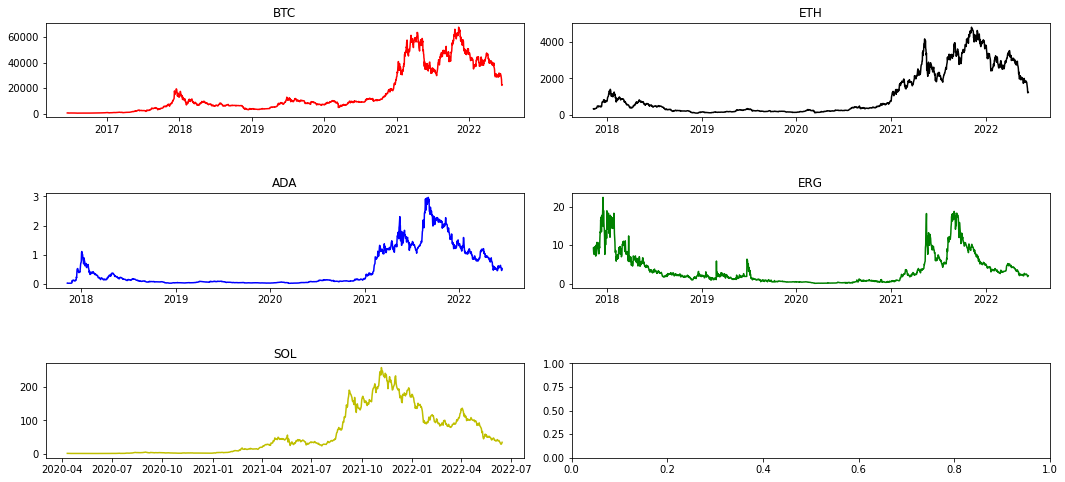

In [15]:
fig, axs = plt.subplots(3,2,figsize=(18,8), gridspec_kw={'hspace': 0.8, 'wspace': 0.1})

axs[0, 0].plot(df['BTC-USD'], c='r')
axs[0, 0].set_title('BTC')
axs[0, 1].plot(df['ETH-USD'], c='k')
axs[0, 1].set_title('ETH')
axs[1, 0].plot(df['ADA-USD'], c='b')
axs[1, 0].set_title('ADA')
axs[1, 1].plot(df['ERG-USD'], c='g')
axs[1, 1].set_title('ERG')
axs[2, 0].plot(df['SOL-USD'], c='y')
axs[2, 0].set_title('SOL')

Comparaison of daily volatilities

(-0.6, 0.6)

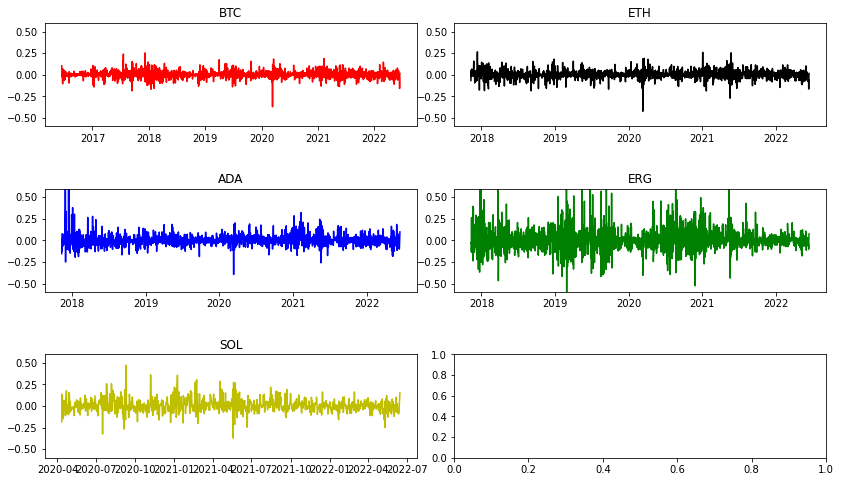

In [16]:
fig, axs = plt.subplots(3, 2,figsize=(14,8),gridspec_kw={'hspace': 0.6, 'wspace': 0.1})

axs[0, 0].plot(retornos_diarios['BTC-USD'], c='r')
axs[0, 0].set_title('BTC')
axs[0, 0].set_ylim([-0.6, 0.6])
axs[0, 1].plot(retornos_diarios['ETH-USD'], c='k')
axs[0, 1].set_title('ETH')
axs[0, 1].set_ylim([-0.6, 0.6])
axs[1, 0].plot(retornos_diarios['ADA-USD'], c='b')
axs[1, 0].set_title('ADA')
axs[1, 0].set_ylim([-0.6, 0.6])
axs[1, 1].plot(retornos_diarios['ERG-USD'], c='g')
axs[1, 1].set_title('ERG')
axs[1, 1].set_ylim([-0.6, 0.6])
axs[2, 0].plot(retornos_diarios['SOL-USD'], c='y')
axs[2, 0].set_title('SOL')
axs[2, 0].set_ylim([-0.6, 0.6])

Text(0.5, 1.0, 'SOL')

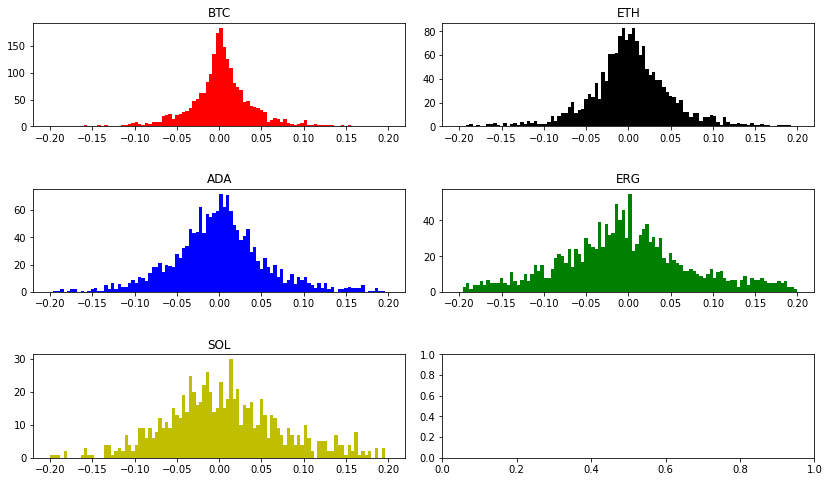

In [17]:
fig, axs = plt.subplots(3, 2,figsize=(14,8),gridspec_kw={'hspace': 0.6, 'wspace': 0.1})


axs[0, 0].hist(retornos_diarios['BTC-USD'],bins=100,color='r', range=(-0.2, 0.2))
axs[0, 0].set_title('BTC')
axs[0, 1].hist(retornos_diarios['ETH-USD'],bins=100,color='k', range=(-0.2, 0.2))
axs[0, 1].set_title('ETH')
axs[1, 0].hist(retornos_diarios['ADA-USD'],bins=100,color='b', range=(-0.2, 0.2))
axs[1, 0].set_title('ADA')
axs[1, 1].hist(retornos_diarios['ERG-USD'],bins=100,color='g', range=(-0.2, 0.2))
axs[1, 1].set_title('ERG')
axs[2, 0].hist(retornos_diarios['SOL-USD'],bins=100,color='y', range=(-0.2, 0.2))
axs[2, 0].set_title('SOL')

Extreme returns

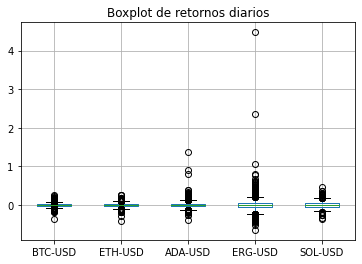

In [18]:
retornos_diarios.boxplot()
plt.title('Boxplot de retornos diarios')
plt.show()

Whitout outliers

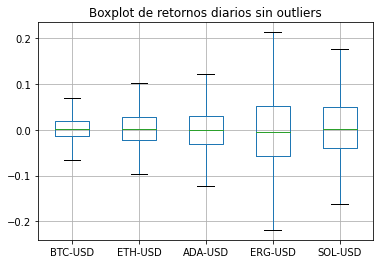

In [19]:
retornos_diarios.boxplot(showfliers=False)
plt.title('Boxplot de retornos diarios sin outliers')
plt.show()

Correlations of Cryptocurrency returns

In [20]:
retornos_diarios.corr()

Symbols,BTC-USD,ETH-USD,ADA-USD,ERG-USD,SOL-USD
Symbols,,,,,
BTC-USD,1.000000,0.763859,0.536157,0.213054,0.405930
ETH-USD,0.763859,1.000000,0.589636,0.203541,0.529348
ADA-USD,0.536157,0.589636,1.000000,0.154371,0.440735
ERG-USD,0.213054,0.203541,0.154371,1.000000,0.234632
SOL-USD,0.405930,0.529348,0.440735,0.234632,1.000000


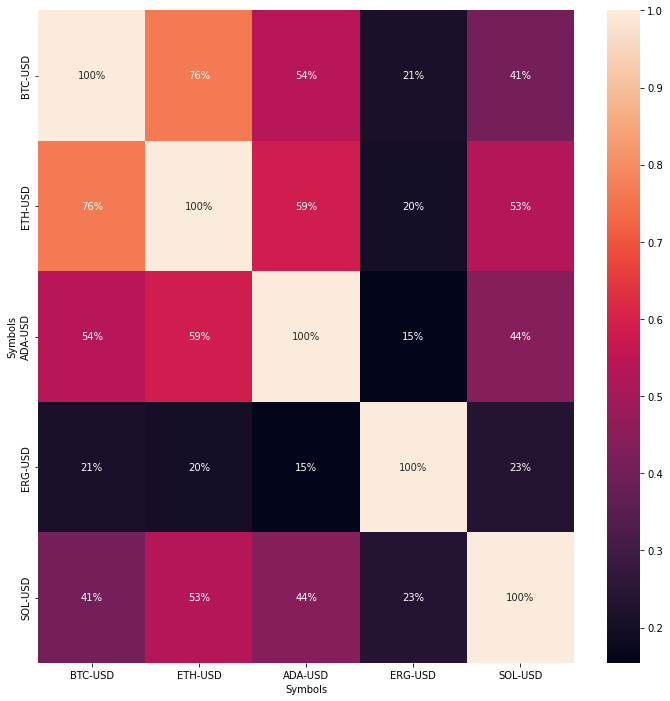

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(retornos_diarios.corr(), annot=True, fmt='.0%')
plt.show()

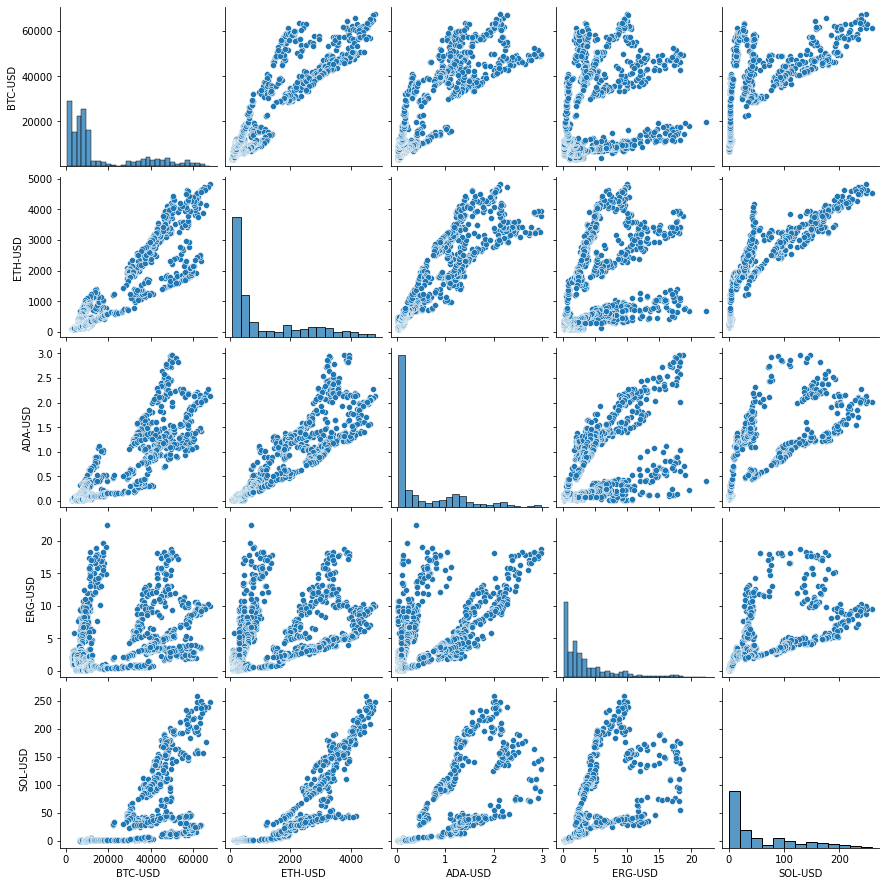

In [22]:
sns.pairplot(data=df)

In [ ]:
from prophet import Prophet